In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data, iris.target,random_state=0)
X_train, X_test, y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set : {} size of test set: {}".format(X_train.shape[0],X_test.shape[0]))

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        #evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, stroe the score and parameters
        if score> best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            #rebuild a model on the combined training and validation set,
            #and evaluate it on the test set
            svm = SVC(**best_parameters)
            svm.fit(X_trainval,y_trainval)
            test_score = svm.score(X_test,y_test)

            print("Best score on validation set:{}:.2f".format(best_score))
            print("Best parameters : ", best_parameters)
            print("Test set score with best parameters : {:.2f}".format(test_score))

Size of training set : 112 size of test set: 38
Best score on validation set:0.23684210526315788:.2f
Best parameters :  {'C': 0.001, 'gamma': 0.001}
Test set score with best parameters : 0.24
Best score on validation set:0.5789473684210527:.2f
Best parameters :  {'C': 1, 'gamma': 0.001}
Test set score with best parameters : 0.58
Best score on validation set:0.9210526315789473:.2f
Best parameters :  {'C': 10, 'gamma': 0.001}
Test set score with best parameters : 0.92
Best score on validation set:0.9736842105263158:.2f
Best parameters :  {'C': 100, 'gamma': 0.001}
Test set score with best parameters : 0.97


In [2]:
from sklearn.model_selection import cross_val_score
import numpy as np

for gamma in[0.001, 0.01, 0.1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        # for each conbination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score> best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

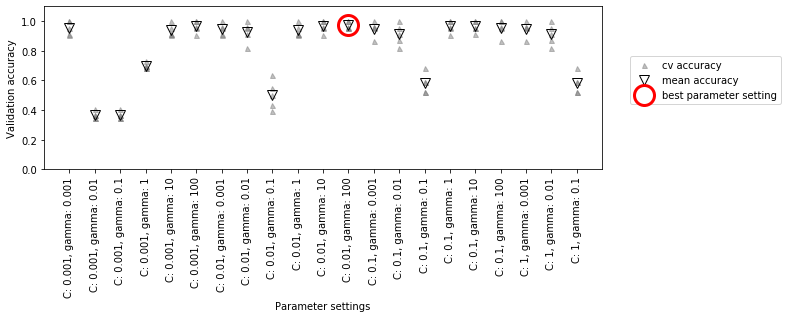

In [3]:
import mglearn

mglearn.plots.plot_cross_val_selection()

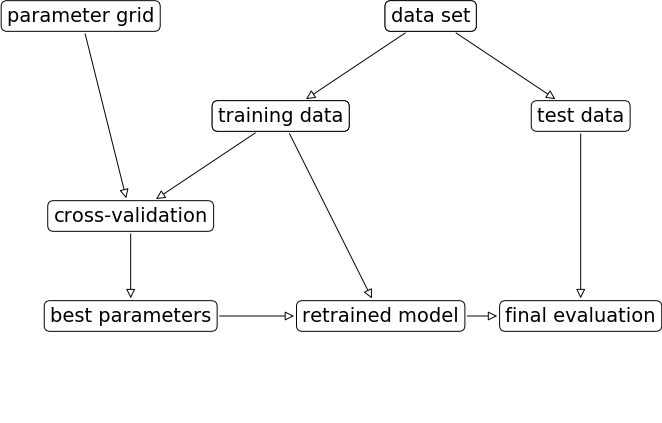

In [4]:
mglearn.plots.plot_grid_search_overview()

In [5]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100],
'gamma' : [0.001,0.01,0.1,1,10,100]}
print("Prameter grid:\n{}".format(param_grid))

Prameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(),param_grid,cv=5)

In [7]:
X_train, X_test,y_train,y_test= train_test_split(iris.data,iris.target,random_state=0)

In [8]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
print("Test set score : {:.2f}".format(grid_search.score(X_test,y_test)))

Test set score : 0.97


In [10]:
print("best parameters: {}".format(grid_search.best_params_))
print("best cross_validation score:{:.2f}".format(grid_search.best_score_))

best parameters: {'C': 10, 'gamma': 0.1}
best cross_validation score:0.97


In [11]:
print("best estimator : \n{}".format(grid_search.best_estimator_))

best estimator : 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [12]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000755,0.000220,0.000362,0.000160,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001092,0.000539,0.000646,0.000479,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001158,0.000400,0.000483,0.000092,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.010714,0.020239,0.000301,0.000048,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001014,0.000487,0.001637,0.001695,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


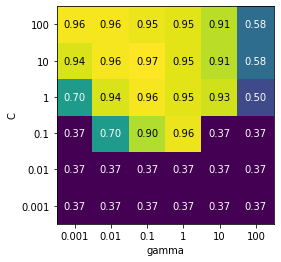

In [13]:
scores = np.array(results.mean_test_score).reshape(6,6)

#plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap="viridis")

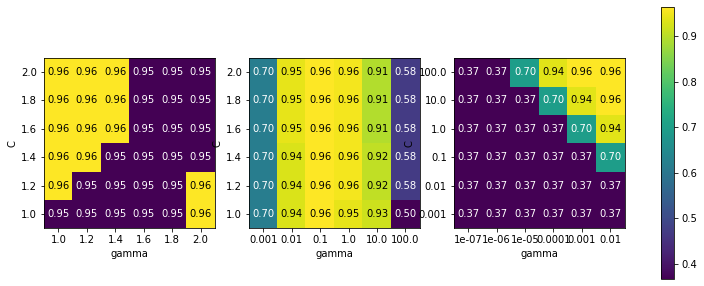

In [14]:
from matplotlib import pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                        'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                        'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(
            scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
            yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [15]:
param_grid = [{'kernel': ['rbf'],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                  {'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [16]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.000532627,0.000880194,0.000527811,0.000566578,0.000846481,0.000548172,0.000668144,0.00064044,0.000658274,0.000724363,...,0.000576735,0.000545263,0.000506306,0.000444078,0.00063777,0.000584745,0.000693035,0.000451422,0.000396442,0.00050478
std_fit_time,1.84222e-05,0.000543684,4.46142e-06,6.43267e-05,0.000502646,5.56725e-05,0.00020979,0.000148628,0.000100357,0.00017332,...,7.47034e-05,2.49482e-05,8.56328e-05,9.92345e-05,6.45291e-05,0.000110532,0.000135661,2.40321e-05,7.83624e-05,0.000165598
mean_score_time,0.000258112,0.000629568,0.000257158,0.000271225,0.000356531,0.000282621,0.000319052,0.000345564,0.00033803,0.000371742,...,0.000276375,0.000266075,0.000303745,0.000291252,0.000289869,0.000317621,0.000340366,0.000261593,0.000264215,0.000380659
std_score_time,6.17426e-06,0.000620557,3.15074e-06,1.56898e-05,0.000139697,5.00724e-05,0.000107058,0.000110949,8.00637e-05,0.000110493,...,1.40803e-05,1.56029e-05,5.50017e-05,6.23579e-05,1.65555e-05,7.18124e-05,8.37965e-05,1.90445e-05,5.2608e-05,0.00020472
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,1e-07,1e-06,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,...,1e-05,0.0001,0.001,0.01,1e-07,1e-06,1e-05,0.0001,0.001,0.01
params,"{'C': 0.001, 'gamma': 1e-07}","{'C': 0.001, 'gamma': 1e-06}","{'C': 0.001, 'gamma': 1e-05}","{'C': 0.001, 'gamma': 0.0001}","{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.01, 'gamma': 1e-07}","{'C': 0.01, 'gamma': 1e-06}","{'C': 0.01, 'gamma': 1e-05}","{'C': 0.01, 'gamma': 0.0001}",...,"{'C': 10.0, 'gamma': 1e-05}","{'C': 10.0, 'gamma': 0.0001}","{'C': 10.0, 'gamma': 0.001}","{'C': 10.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 1e-07}","{'C': 100.0, 'gamma': 1e-06}","{'C': 100.0, 'gamma': 1e-05}","{'C': 100.0, 'gamma': 0.0001}","{'C': 100.0, 'gamma': 0.001}","{'C': 100.0, 'gamma': 0.01}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.347826,0.695652,0.913043,1,0.347826,0.347826,0.695652,0.913043,1,1
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.347826,0.695652,0.913043,0.956522,0.347826,0.347826,0.695652,0.913043,0.956522,0.913043
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,0.363636,0.681818,1,1,0.363636,0.363636,0.681818,1,1,1


In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores) 
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


In [18]:
def nested_cv(X,y,inner_cv,outer_cv,Classifier, parameter_grid):
    outer_scores = []
    #for each split of the data in the outer cross-validation 
    #(split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X,y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        #iterate over parameters
        for parameters in parameter_grid:
            #accumulate score over inner splits
            cv_scores=[]
            #iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                X[training_samples],y[training_samples]):
                #build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                cv_scores.append(score)
            #compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score>best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        #build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples],y[training_samples])
        #evaluate
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)

In [19]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target,StratifiedKFold(5), StratifiedKFold(5),SVC,ParameterGrid(param_grid))
print("Cross-validation scores:{}".format(scores))

Cross-validation scores:[0.86666667 0.96666667 0.83333333 0.96666667 0.93333333]


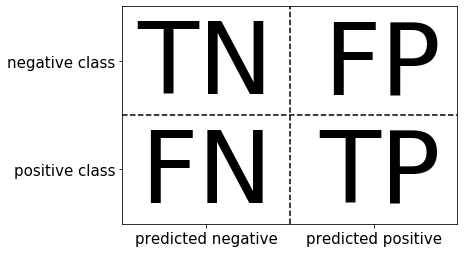

In [20]:
mglearn.plots.plot_binary_confusion_matrix()

In [21]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [22]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score : {:.2f}".format(dummy_majority.score(X_test,y_test)))

Unique predicted labels: [False]
Test score : 0.90


In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print("Test score:{:.2f}".format(tree.score(X_test,y_test)))

Test score:0.92


In [24]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score : {:.2f}".format(dummy.score(X_test,y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score:{:.2f}".format(logreg.score(X_test,y_test)))

dummy score : 0.82
logreg score:0.98


In [25]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


In [26]:
from sklearn.metrics import confusion_matrix

print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test,pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test,pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[355  48]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


In [27]:
from sklearn.metrics import f1_score
print("f1 score morst frequent: {:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("f1 score dummy : {:.2f}".format(f1_score(y_test,pred_dummy)))
print("f1 score tree:{:.2f}".format(f1_score(y_test,pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score morst frequent: 0.00
f1 score dummy : 0.08
f1 score tree:0.55
f1 score logistic regression: 0.92


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [29]:
print(classification_report(y_test,pred_dummy,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.89      0.88      0.89       403
        nine       0.08      0.09      0.08        47

    accuracy                           0.80       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.80      0.80       450



In [30]:
print(classification_report(y_test,pred_logreg,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [31]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)

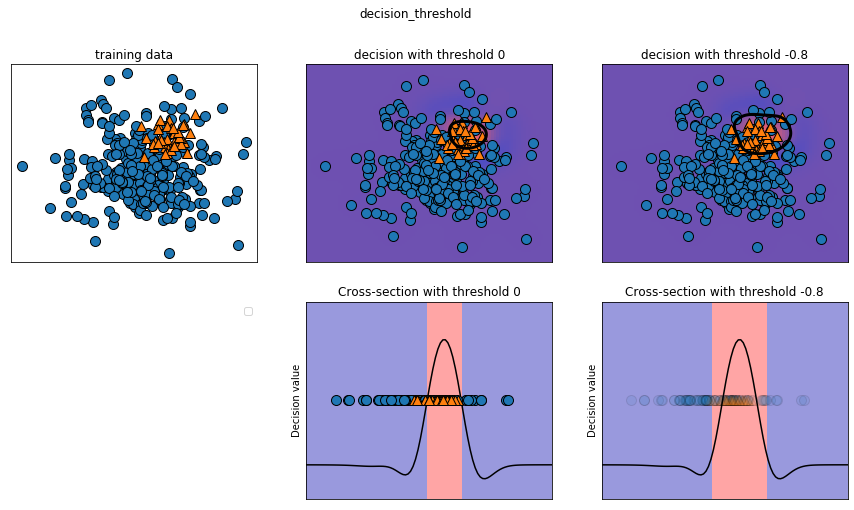

In [32]:
mglearn.plots.plot_decision_threshold()

In [33]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [34]:
y_pred_lower_threshold = svc.decision_function(X_test)> -.8

In [35]:
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [36]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

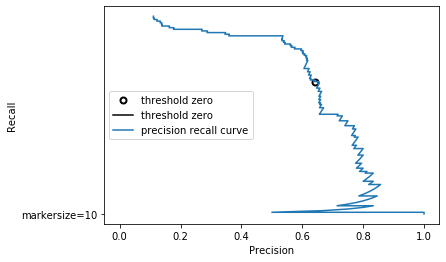

In [37]:
#Precision recall curve for SVC
#use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))
#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o','markersize=10',label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


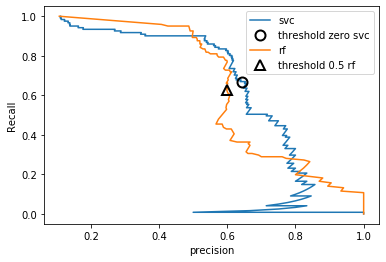

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train,y_train)

#RandomForestClassifier has predict_proba, but not decision_fuction
precision_rf,recall_rf, thresholds_rf = precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label="svc")

plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero svc",fillstyle="none",c='k',mew=2)

plt.plot(precision_rf, recall_rf,label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)
plt.xlabel("precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [39]:
print("f1_score of random forest : {:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("f1_score of svc:{:.3f}".format(f1_score(y_test,svc.predict(X_test))))

f1_score of random forest : 0.610
f1_score of svc:0.656


In [40]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest : {:.3f}".format(ap_rf))
print("Average precision of svc:{:.3f}".format(ap_svc))

Average precision of random forest : 0.660
Average precision of svc:0.666


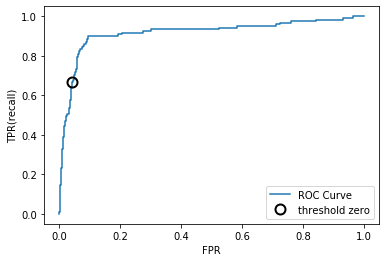

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
# find threshold closest to zero

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)


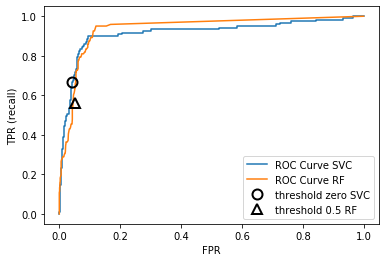

In [42]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
            label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
            label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [43]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


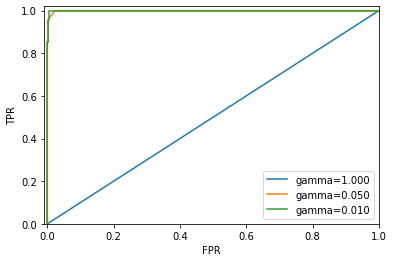

In [44]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test)) 
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [47]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression().fit(X_train,y_train)
pred = lr.predict(X_test)
print("Accuracy:{:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion matix:\n{}".format(confusion_matrix(y_test,pred)))

Accuracy:0.951
Confusion matix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


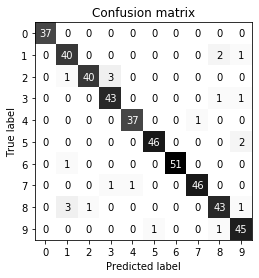

In [48]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',ylabel='True label', xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [52]:
print("Micro average f1 score : {:3f}".format(f1_score(y_test,pred,average="micro")))
print("Macro average f1 score : {:3f}".format(f1_score(y_test,pred,average="macro")))

Micro average f1 score : 0.951111
Macro average f1 score : 0.951897


In [54]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy)) 
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_)) 
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test)))) 
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [57]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


ModuleNotFoundError: No module named 'preamble'